# Dummy variable


In [2]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot  as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Pembuatan dummy variable

In [4]:
X = tips.drop(columns= ['tip'])
Y = tips['tip']

X = pd.get_dummies(X, columns=['sex','smoker','day','time'], drop_first=True)
X

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [5]:
X = sm.add_constant(X)
X

,const,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.0,16.99,2,1,1,0,0,1,1
1,1.0,10.34,3,0,1,0,0,1,1
2,1.0,21.01,3,0,1,0,0,1,1
3,1.0,23.68,2,0,1,0,0,1,1
4,1.0,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,1.0,29.03,3,0,1,0,1,0,1
240,1.0,27.18,2,1,0,0,1,0,1
241,1.0,22.67,2,0,0,0,1,0,1
242,1.0,17.82,2,0,1,0,1,0,1


In [6]:
model = sm.OLS(Y,X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.20e-28
Time:                        16:37:21   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

Interpretasi Dari Summary

1. Adjusted R-Square : 0.452 == 45.2 % . Artinya model dapat menjelaskan variasi nilai tips sebesar 45.2 % dengan variable total_bill, size, sex, smoker, day, time 

2. Prob (F-Statistic) : 1.20e-28 . Ini < 0.05 (tolak Ho) , minimal ada salah satu indipenden variabel (bisa salah satu atau seluruhnya) yang berpengaruh terhadap tip

3. Uji T. Prob dari masing-masing Beta (B0, B1, B2) - uji T
    - Prob B0 : 0.022 : < 0.05 (tolak H0) artinya model memerlukan intersep
    - Prob B1 : 0.000 : < 0.05 (tolak H0) artinya total bil berpengaruh secara positif terhadap tip
    - Prob B2 : 0.051 : > 0.05 (terima H0) artinya size tidak berpengaruh secara positif terhadap tip
    - Prob B3 : 0.819 : > 0.05 (terima H0) artinya Jenis kelamin perempuan tidak berpengaruh secara positif terhadap tip
    - Prob B4 : 0.556 : > 0.05 (terima H0) artinya smoker tidak berpengaruh secara positif terhadap tip
    - Prob B5 : 0.680 : > 0.05 (terima H0) artinya variable hari jumat tidak berpengaruh secara positif terhadap tip
    - Prob B6 : 0.931 : > 0.05 (terima H0) artinya variable hari Sabtu tidak berpengaruh secara positif terhadap tip
    - Prob B7 : 0.772 : > 0.05 (terima H0) artinya variable hari minggu tidak berpengaruh secara positif terhadap tip
    - Prob B8 : 0.878 : > 0.05 (terima H0) artinya variable waktu dinner tidak berpengaruh secara positif terhadap tip

4. Baca B0, B1, B2 .., B8 . tips = 0.5908 + 0.0945 (total bill) + 0.1760 (size) + 0.0324 ( sex_female) + 0.0864 (smoker) + 0.1623 (day_fri) + 0.0408 (day_sat) + 0.1368 (day_sun) -0.0681 (time_dinner)

    - Nilai B0 (coef) : 0.5908 : nilai tips saat semua variable 0.
    - Nilai B1 (total bill) : 0.0945 : Setiap kenaikan total bil sebesar 1 dolar, tip akan meningkat kira-kira 0.0927 dolar. Interpretasi ini hanya berlaku dalam selang 3.07 dolar hingga 50.81 dolar.
    - Nilai B2 (size) : 0.1760 : Setiap kenaikan size sebesar 1 orang, tip akan meningkat kira-kira sebesar 0.1926 dolar. Interpreatasi ini hanya berlaku ketika nilai size berada pada rentang 1 orang hingga 6 orang
    - Nilai B3 (sex_female) : Setiap 1 Pelanggan perempuan akan memberikan tip dengan kenaikan 0.0324 dolar lebih besar dari pada laki-laki
    - Nilai B4 (smoker) : Setiap 1 pelanggan yang merokok akan memberikan tip dengan kenaikan rata-rata 0.0864 dolar dari pada yang tidak merokok
    - Nilai B5 (day_fri) : setiap pelanggan yang makan di restauran ini pada hari jumat akan memberikan tip dengan kenaikan rata-rata 0.1623 dari pada pelanggan di hari kamis
    - Nilai B6 (day_sat) : Setiap pelanggan yang makan di restauran ini pada hari sabtu akan memberikan tip dengan kenaikan rata-rata 0.0408 dari pada pelanggan di hari kamis
    - Nilai B7 (day_sun) : Setiap pelanggan yang makan di restauran ini pada hari minggu akan memberikan tip dengan kenaikan rata-rata 0.1368 dari pada pelanggan di hari kamis
    - Nilai B8 (time_dinner) : Setiap pelanggan yang lunch di restauran ini akan memberikan tip dengan kenaikan rata-rata 0.0681 dari pada pelanggan saat dinner


Interpretasi ini berlaku hanya selang tertentu ya. Ingat! jadi kita perlu cek selang nya, pakai deskriptif analitiks

In [7]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

C:\Users\surve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'residual')

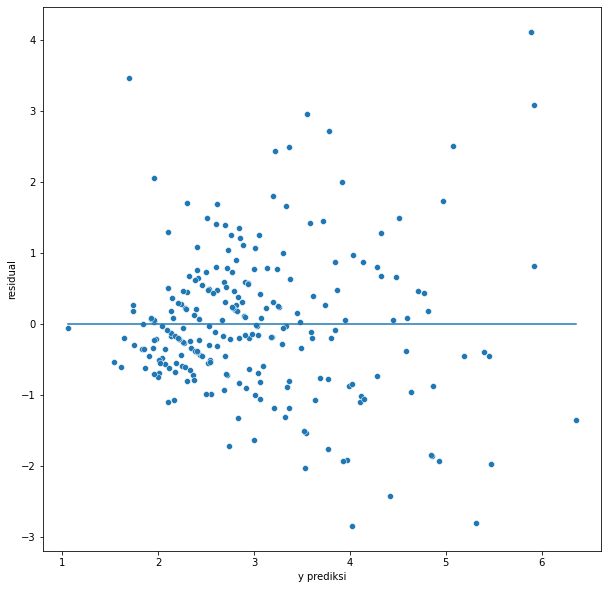

In [9]:
plt.figure (figsize=(10,10))
sns.scatterplot(x = result.fittedvalues, y=result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('y prediksi')
plt.ylabel('residual')

In [10]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

    return vif

In [11]:
X.drop(columns='const')

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [13]:
calc_vif(X.drop(columns='const'))

,variable,vif
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


Interpretasi dari keseulurah data tips dengan model regresi

Summary

1. Data memenuhi asumsi normalitas, kita anggap terpenuhi (uji F dan uji T nya valid)
2. Analisa Gauss - markov 
    - Rataan error = 0 . Kita anggap terpenuhi
    - Eror tidak saling berkorelasi. Kita anggap terpenuhi 
    - homoscedasititas. Ada indikasi tidak terpenuhi karena terdapat eror yang homogen pada y prediksi 2 - 4 dengan nilai residual 0 sampai -2
3. Multikolinearitas. Ada indikasi tidak terpenuhi, karena nilainya rata-rata > 1 dengan variable size, day_sat, day_sun, time_diinner akan membuat model bias

Sehingga data tips tidak dapat menggunakan model multi regresi linear